In [85]:
import numpy as np
import matplotlib.pyplot as plt
from ipyfilechooser import FileChooser
import os
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.datasets import mnist
from IPython.display import Image
from IPython.core.display import HTML 

Обучающая выборка модели перевода градусов цельсия в фарингейт

In [2]:
c=np.array([-40,-10,0,8,15,22,38])
f=np.array([-40,14,32,46,59,72,100])

Модель

In [3]:
model = keras.Sequential([
    Dense(units=1,input_shape=(1,) ,activation='linear'),
])

2022-09-17 14:21:20.178565: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 14:21:20.178831: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-17 14:21:20.178909: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-17 14:21:20.178968: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-17 14:21:20.179023: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Компиляция модели и определение метода оценки и оптимизатора

In [4]:
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(0.1))

Оптимизация модели

In [5]:
history = model.fit(c,f,epochs=500,verbose=False)

Граффики

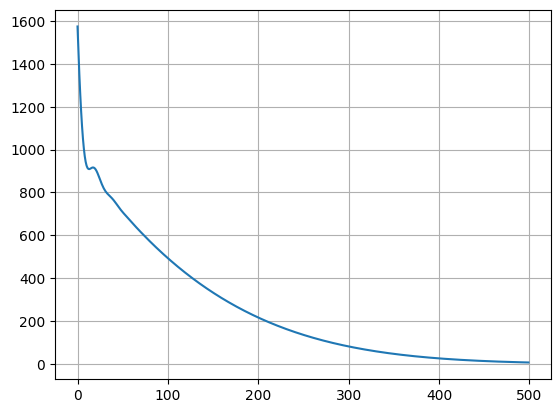

In [6]:
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

Использование сети

In [7]:
model.predict([156])

1/1 [==============================] - 0s 95ms/step


array([[313.3006]], dtype=float32)

Веса модели

In [8]:
print(model.get_weights())

[array([[1.8207893]], dtype=float32), array([29.257439], dtype=float32)]


---

Распознавание цифр

Запись датасета
<br>
<br>
x_train - изображения цифр обучающей выборки
<br>
y_traint  - вектор значений каждого изображения
<br>
x_test - изображения цифр тестовой выюорки
<br>
y_test - вектор соответсвующих значений тестовой выборки 

In [9]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

Картинки представлены в градациях серого (0 - черный, 255 - белый) 1-канальный png файл
<br>
<br>
Производим стандартизацию данных изображений

In [10]:
x_train=x_train / 255
x_test=x_test / 255

Визуализация первых 25 элементов тренировочного датасета

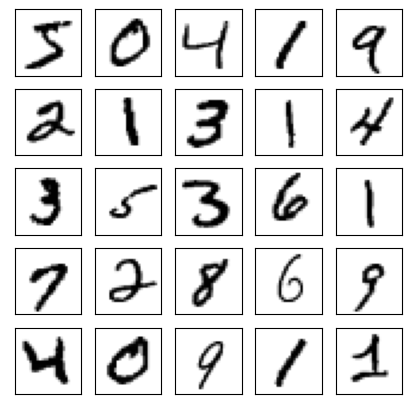

In [11]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap=plt.cm.binary)

Описание Модели с 2-мя скрытыми слоями

In [12]:
num_predict = keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128,activation="relu"), 
    Dense(10,activation = "softmax"),
])

ReLU

In [13]:
Image(url= "https://newtechnologylifestyle.net/wp-content/uploads/2018/02/ReLU.png", width=600, height=500)

SoftMax

In [14]:
Image(url= "https://i.ytimg.com/vi/o6HrH2EMD-w/maxresdefault.jpg", width=600, height=500)

Общая структура модели

In [15]:
num_predict.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Компиляция модели

In [16]:
num_predict.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Приведение значений y_train и y_test к виду векторов с вероятностями
<br><br>
Например y_train[1]=5 , а нам надо представить это в виде вектора [0,0,0,0,0,1,0,0,0,0], где 1 - вероятность схожести с 5

In [17]:
y_train_vec=keras.utils.to_categorical(y_train,10)
y_test_vec=keras.utils.to_categorical(y_test,10)

Оптимизация модели
<br>
<br>
validation_split=0.2 - разделение выборки на обучающую(80%) и валидационную(20%)
<br>
<br>
Валидационная выборка необходима для поиска момента переобучения модели, если граффики точности обучающей и валидационной выборки начинают расходиться - значит модель переобучается

In [19]:
num_history=num_predict.fit(x_train,y_train_vec,batch_size=32,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2817 - accuracy: 0.9203 - val_loss: 0.1529 - val_accuracy: 0.9577
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1268 - accuracy: 0.9624 - val_loss: 0.1296 - val_accuracy: 0.9616
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0891 - accuracy: 0.9738 - val_loss: 0.1074 - val_accuracy: 0.9698
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0661 - accuracy: 0.9799 - val_loss: 0.1000 - val_accuracy: 0.9716
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0900 - val_accuracy: 0.9740


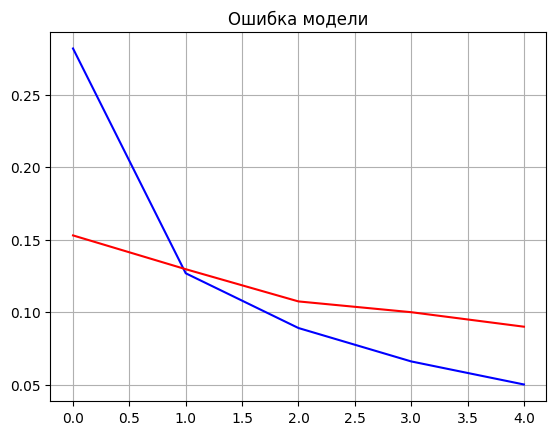

In [20]:
plt.title("Ошибка модели")
plt.plot(num_history.history["loss"],color="blue",label='ошибка тренировки')
plt.plot(num_history.history["val_loss"],color = "red",label='ошибка валидации')
plt.grid(True)
plt.show()

Проверка работы модели на тестовой выборке

In [21]:
num_predict.evaluate(x_test,y_test_vec)

313/313 [==============================] - 1s 1ms/step - loss: 0.0858 - accuracy: 0.9734


[0.08578886091709137, 0.9733999967575073]

Подача конкретного изображения

n - номер изображения в датасете

1/1 [==============================] - 0s 60ms/step
Вектор схожести : [[3.5350975e-05 3.7962465e-05 2.8634496e-04 8.3097862e-04 7.9962118e-03
  3.9805896e-06 8.7803693e-07 1.2815229e-04 3.5712364e-04 9.9032295e-01]]
Распознанная цифра : 9
Реально написанная цифра : 9


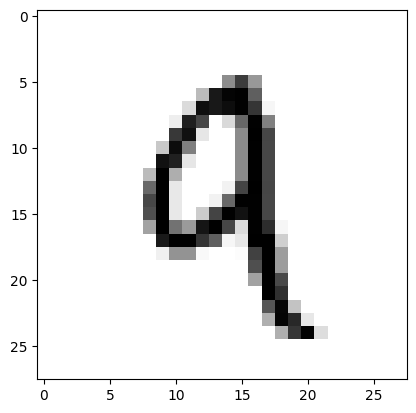

In [22]:
n=125
x=np.expand_dims(x_test[n],axis=0)
res = num_predict.predict(x)
print(f"Вектор схожести : {res}")
print(f"Распознанная цифра : {np.argmax(res)}")
print(f"Реально написанная цифра : {y_test[n]}")

plt.imshow(x_test[n],cmap=plt.cm.binary)
plt.show()

Распознание всей тестовой выборки

In [23]:
predict_all = num_predict.predict(x_test)
predict_all = np.argmax(predict_all,axis=1)

313/313 [==============================] - 0s 1ms/step


Проверка результатов

In [25]:
mask = predict_all==y_test

print(mask[:10])

x_false = x_test[~mask]
y_false = predict_all[~mask]
y_false_real = y_test[~mask]

[ True  True  True  True  True  True  True  True  True  True]


Неверно распознанные изображения

Сеть распознала цифру 2 , а наросована цифра 8


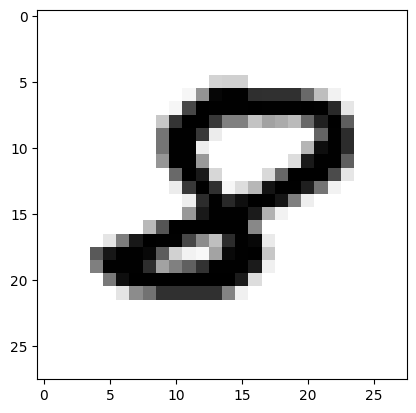

Сеть распознала цифру 9 , а наросована цифра 2


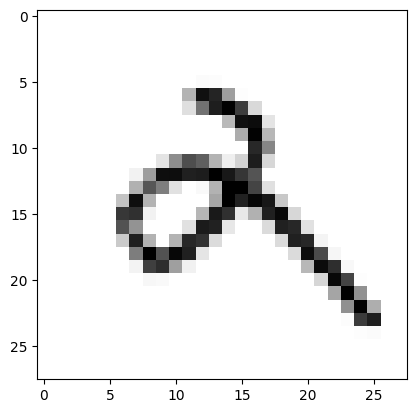

Сеть распознала цифру 8 , а наросована цифра 9


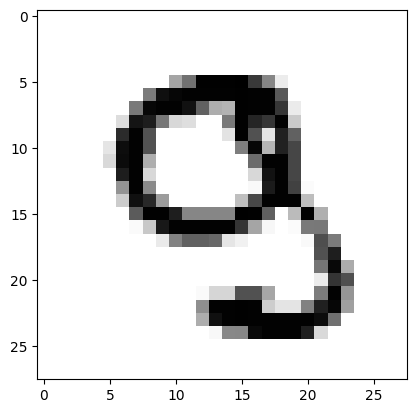

Сеть распознала цифру 8 , а наросована цифра 9


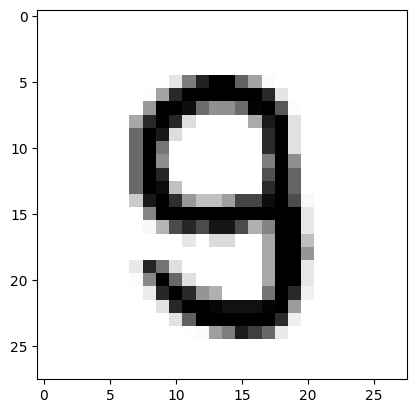

Сеть распознала цифру 6 , а наросована цифра 4


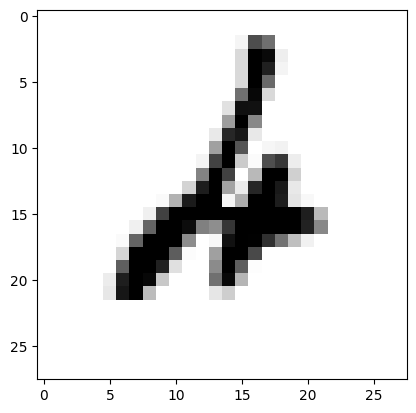

In [26]:
for i in range(5):
    print(f"Сеть распознала цифру {y_false[i]} , а наросована цифра {y_false_real[i]}")
    plt.imshow(x_false[i],cmap=plt.cm.binary)
    plt.show()

Сохранение модели

In [27]:
model.save("stud_text_rec_model")

INFO:tensorflow:Assets written to: stud_text_rec_model/assets


Кнопка выбора файла

In [123]:
fdialog = FileChooser(
    os.getcwd(),
    filename="7.jpg",
    title='<b>Выберите файл</b>',
    show_hidden=False,
    select_default=True,
    show_only_dirs=False
)

display(fdialog)

FileChooser(path='/home/cond3nz/src/NeuroLearn', filename='7.jpg', title='<b>Выберите файл</b>', show_hidden=F…

In [124]:
fdialog.selected

'/home/cond3nz/src/NeuroLearn/7.jpg'

Предобработка загруженного изображения для передачи в НС

/tmp/ipykernel_55711/2863598418.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imRGB_ns = imRGB_fs.resize((28,28), Image.ANTIALIAS)


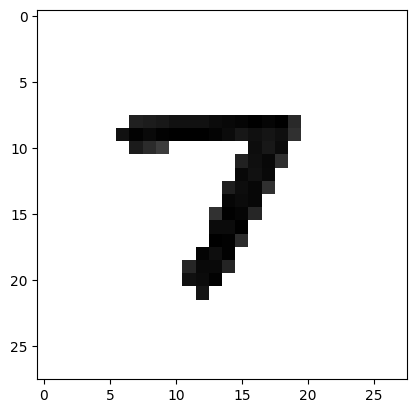

In [125]:
from PIL import Image, ImageOps
imRGB_fs = Image.open(fdialog.selected)
imRGB_ns = imRGB_fs.resize((28,28), Image.ANTIALIAS)
imGS_ns = ImageOps.grayscale(imRGB_ns)
imGS_ns_invert = ImageOps.invert(imGS_ns)
imnp = np.array(imGS_ns_invert)
imnp= imnp /255
imnp[imnp<0.75]=0
plt.imshow(imnp,cmap=plt.cm.binary)
plt.show()

Оценка изображения НС и выдача результата

In [126]:
predict_result=num_predict.predict(imnp)
predict_result=np.argmax(predict_result,axis=1)
print(predict_result)

1/1 [==============================] - 0s 17ms/step
[7]
